In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import sklearn 
from sklearn import linear_model

In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
df.sample(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
13392,214,male,group D,bachelor's degree,standard,completed,widowed,NaN,yes,1.0,school_bus,< 5,95,96,98
170,183,female,group D,associate's degree,standard,none,single,sometimes,no,NaN,private,< 5,63,67,68
11618,316,female,group E,associate's degree,standard,completed,single,sometimes,yes,3.0,private,> 10,78,87,88
14537,420,female,group C,some high school,standard,completed,married,sometimes,yes,4.0,private,5 - 10,58,77,75
22277,731,female,group D,high school,standard,none,married,sometimes,yes,3.0,school_bus,5 - 10,66,62,66
28290,183,male,group C,some high school,standard,completed,single,sometimes,yes,3.0,school_bus,5 - 10,69,70,64
8455,950,female,group C,associate's degree,standard,none,married,sometimes,no,1.0,private,< 5,76,83,88
3045,214,female,group D,high school,standard,none,single,sometimes,yes,7.0,school_bus,> 10,59,71,67
2828,980,male,group C,some college,free/reduced,completed,divorced,sometimes,yes,3.0,school_bus,5 - 10,43,35,37
8589,92,female,group C,some high school,standard,completed,married,sometimes,yes,5.0,NaN,5 - 10,66,84,83


In [3]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30636    False
30637    False
30638    False
30639    False
30640    False
Length: 30641, dtype: bool

In [4]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
print(df.mean(numeric_only=True))
print(df.median(numeric_only=True))
print(df.mode(numeric_only=True).iloc[0])

Unnamed: 0      499.556607
NrSiblings        2.145894
MathScore        66.558402
ReadingScore     69.377533
WritingScore     68.418622
dtype: float64
Unnamed: 0      500.0
NrSiblings        2.0
MathScore        67.0
ReadingScore     70.0
WritingScore     69.0
dtype: float64
Unnamed: 0       0.0
NrSiblings       1.0
MathScore       64.0
ReadingScore    65.0
WritingScore    67.0
Name: 0, dtype: float64


#### What are Percentiles?
#### Percentiles are used in statistics to give you a number that describes the value that a given percent of the values are lower than.

In [9]:
np.percentile(df['MathScore'], 25)

56.0

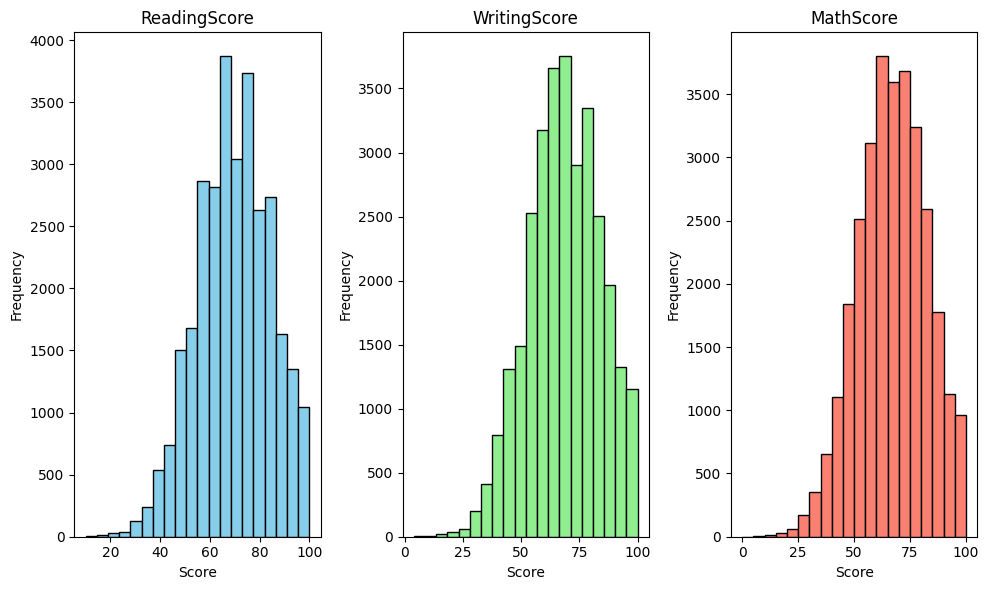

In [10]:
#trực quan hóa các biến ReadingScore, WritingScore, MathScore bằng biểu đồ histogram để kiểm tra sự phân bố dữ liệu
#Vẽ 3 biểu đồ histogram cho 3 biến số ReadingScore, WritingScore, MathScore

# Đọc dữ liệu từ file CSV và lưu vào DataFrame
df = pd.read_csv('Expanded_data_with_more_features.csv')

# Lấy dữ liệu từ các cột "ReadingScore", "WritingScore" và "MathScore"
reading_scores = df['ReadingScore']
writing_scores = df['WritingScore']
math_scores = df['MathScore']

# Tạo biểu đồ histogram cho từng biến số
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(reading_scores, color='skyblue', edgecolor='black', bins=20)
plt.title('ReadingScore')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(writing_scores, color='lightgreen', edgecolor='black', bins=20)
plt.title('WritingScore')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(math_scores, color='salmon', edgecolor='black', bins=20)
plt.title('MathScore')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'ReadingScore'}>,
        <Axes: title={'center': 'MathScore'}>],
       [<Axes: title={'center': 'WritingScore'}>, <Axes: >]], dtype=object)

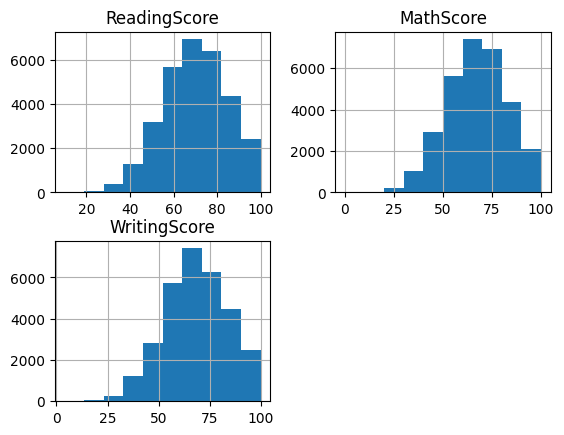

In [11]:
df[['ReadingScore', 'MathScore', 'WritingScore']].hist()

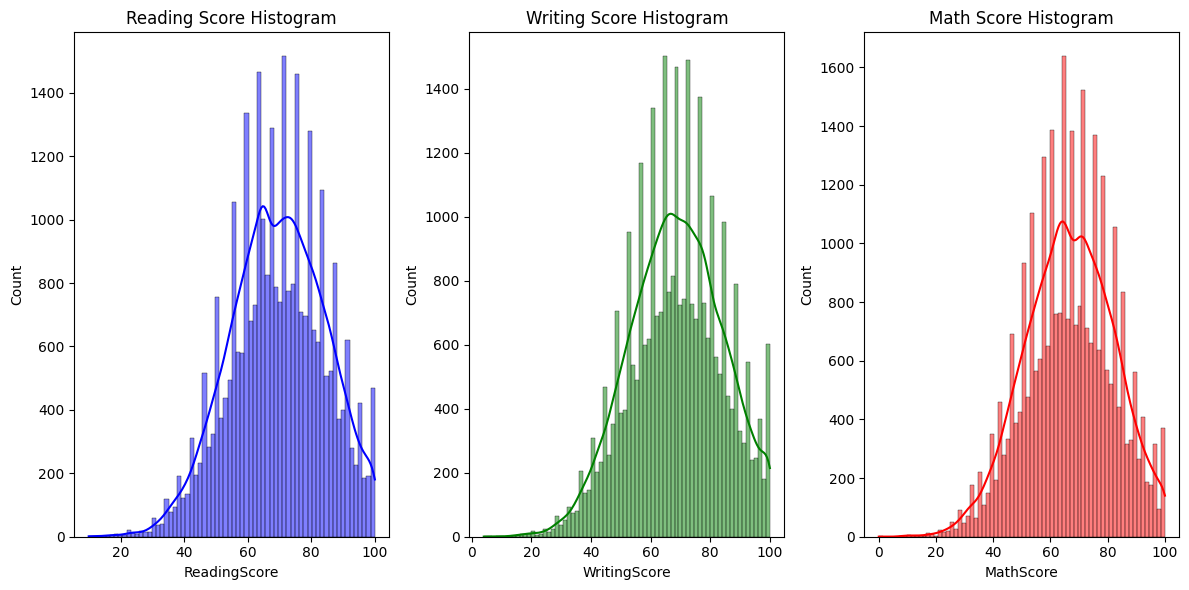

In [12]:


# Tạo một figure mới
plt.figure(figsize=(12, 6))

# Vẽ histogram cho ReadingScore
plt.subplot(1, 3, 1)
sns.histplot(df['ReadingScore'], kde=True, color='blue')
plt.title('Reading Score Histogram')

# Vẽ histogram cho WritingScore
plt.subplot(1, 3, 2)
sns.histplot(df['WritingScore'], kde=True, color='green')
plt.title('Writing Score Histogram')

# Vẽ histogram cho MathScore
plt.subplot(1, 3, 3)
sns.histplot(df['MathScore'], kde=True, color='red')
plt.title('Math Score Histogram')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

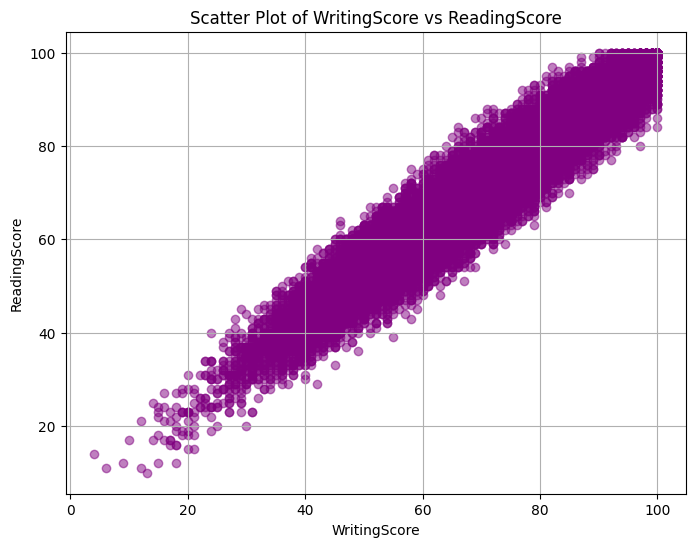

In [13]:
#Kiểm tra sự tương qua giữa 2 biến WritingScore và ReadingScore bằng biểu đồ
plt.figure(figsize=(8, 6))
plt.scatter(df['WritingScore'], df['ReadingScore'], color='purple', alpha=0.5)
plt.title('Scatter Plot of WritingScore vs ReadingScore')
plt.xlabel('WritingScore')
plt.ylabel('ReadingScore')
plt.grid(True)
plt.show()

Phương trình đường thẳng: y = 0.9967687083964486 * x + -0.7347322216320813


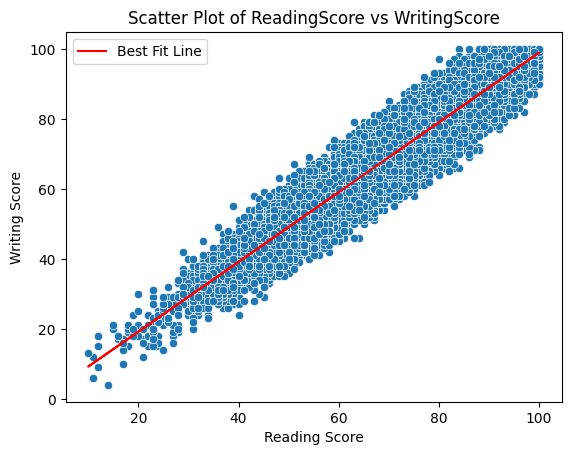

In [14]:
# Vẽ scatter plot
sns.scatterplot(x='ReadingScore', y='WritingScore', data=df)
plt.title('Scatter Plot of ReadingScore vs WritingScore')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

# Vẽ linear regression dùng polyfit
coefficients = np.polyfit(df['ReadingScore'], df['WritingScore'], 1)
slope = coefficients[0]
intercept = coefficients[1]
print("Phương trình đường thẳng: y =", slope, "* x +", intercept)


# Tính toán các điểm trên đường thẳng
x_values = df['ReadingScore']
y_values = slope * x_values + intercept

# Vẽ đường thẳng
plt.plot(x_values, y_values, color='red', label='Best Fit Line')

plt.legend()
plt.show()
#vậy phương trình tìm được là y=0.997x - 0.735

In [15]:
#Tìm phương trình MathScore = a + b.WritingScore + c.ReadingScore (a,b,b=?)

In [16]:
X = df[['WritingScore','ReadingScore']]
y = df['MathScore']
regr = linear_model.LinearRegression()
regr.fit(X, y)
# Print the coefficients and intercept
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [0.30159004 0.55060426]
Intercept: 7.7244619078841055
